<a href="https://colab.research.google.com/github/adrianmarino/neural-network-from-scratch/blob/master/Gradient_descent_optimization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient descent optimization example

In [0]:
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt

### Function to optimize

In [0]:
class ExampleFunction:
    def compute(self, point):
        return np.sin(1/2 * point[0] ** 2 - 1/4 * point[1] ** 2 + 3) \
            * np.cos(2 * point[0] + 1 - np.e ** point[1])


In [5]:
function = ExampleFunction()
function.compute((10, 10))

-0.048514203588286425

### Gradient aproximation

In [0]:
class Gradient:
    def __init__(self, function, h= 0.001): 
        self.__function = function
        self.__h = h

    def compute(self, point):
        grad = np.zeros(2)
        h_point = np.copy(point)
        for i, _ in enumerate(point):
            h_point[i] = h_point[i] + self.__h
            grad[i] = (self.__function.compute(h_point) \
                       - self.__function.compute(point)) / self.__h
        return grad

### Gradien descent algorithm

In [0]:
class GradienDescentAlgorithm:
    def __init__(self, function, initial_point, h, lr):
        self.__function = function
        self.__h = h 
        self.__gradient = Gradient(function, h)
        self.point = np.copy(initial_point)
        self.lr = lr

    def step(self):
        delta = self.__gradient.compute(self.point)
        self.point = self.point - (delta * self.lr)
        return self.point

    def steps(self, count=1000): return [self.step() for _ in range(0, count)]

    def test(self, steps=1000):
        plt.plot([function.compute(p) for p in self.steps(steps)])
        plt.title(f'Gradient Descent Test (H={self.__h}, LR={self.lr})')
        plt.ylabel('F(x, y)')
        plt.xlabel('Steps')

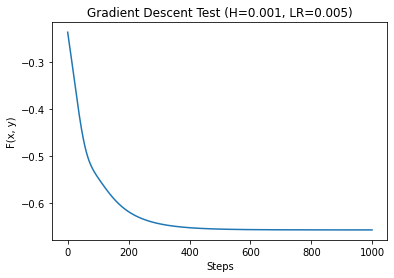

In [8]:
def random_point(): return np.random.rand(2) * 4 -2

h=0.001
lr=0.005

GradienDescentAlgorithm(function, random_point(), h, lr).test(steps=1000)

## Example

In [0]:
def create_map(x_range, y_range, resolution, function):
    X = np.linspace(x_range[0], x_range[1], resolution)
    Y = np.linspace(y_range[0], y_range[1], resolution)
    Z = np.zeros((resolution, resolution))

    for x_index, x in enumerate(X):
        for y_index, y in enumerate(Y):
            Z[y_index, x_index] = function.compute((x, y))
    
    return X, Y, Z

def plot_map(X, Y, Z, resolution):
    plt.contourf(X, Y, Z, resolution)
    plt.colorbar()

def plot_point(point, color='white'): plt.plot(point[0], point[1], '.', c=color)

In [0]:
resolution = 100
X, Y, Z = create_map((-2, 2), (-2, 2), resolution, function)

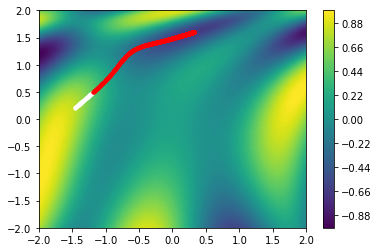

In [37]:
points = GradienDescentAlgorithm(function, random_point(), h, lr).steps(2000)

plot_map(X, Y, Z, resolution)
for i, p in enumerate(points):
    plot_point(p, color='white' if i < 50 else 'red')
plt.show()